In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
import warnings
warnings.filterwarnings('ignore')

In [2]:
twins=pd.read_csv('twins.csv')
twins.head()

,Foster,Biological,Social
0,82,82,high
1,80,90,high
2,88,91,high
3,108,115,high
4,116,115,high


In [4]:
twins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27 entries, 0 to 26
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Foster      27 non-null     int64 
 1   Biological  27 non-null     int64 
 2   Social      27 non-null     object
dtypes: int64(2), object(1)
memory usage: 780.0+ bytes


#### No null values.

In [5]:
twins.describe()

,Foster,Biological
count,27.000000,27.000000
mean,95.111111,95.296296
std,16.082320,15.735347
min,63.000000,68.000000
25%,84.500000,83.500000
50%,94.000000,94.000000
75%,107.500000,104.500000
max,132.000000,131.000000


#### Both twins raised one in 'Foster' and by their 'Parents' have almost the same IQ's with maximum in 'Foster' is 132 while 131 for 'Biological'.

In [6]:
twins.Social.value_counts()

Social
low       14
high       7
middle     6
Name: count, dtype: int64

#### Let's see if the IQ differs according to social status the kids were raised.

In [7]:
twins.groupby('Social',axis=0)['Foster'].describe()

,count,mean,std,min,25%,50%,75%,max
Social,,,,,,,,
high,7.0,103.285714,20.105673,80.0,85.00,108.0,116.5,132.0
low,14.0,93.714286,13.897585,63.0,86.25,95.0,104.0,113.0
middle,6.0,88.833333,14.538455,71.0,78.25,90.5,94.5,111.0


#### It is found that 'low' social are where the most foster kids are raised. The highest average IQ among the 'foster' kids will be from the 'high' class with middle class being the lowest.

In [8]:
twins.groupby('Social',axis=0)['Biological'].describe()

,count,mean,std,min,25%,50%,75%,max
Social,,,,,,,,
high,7.0,107.571429,19.814617,82.0,90.50,115.0,122.00,131.0
low,14.0,91.214286,12.058693,68.0,85.50,93.5,97.00,111.0
middle,6.0,90.500000,12.373358,78.0,79.75,89.5,99.25,107.0


#### Since they are both twins it was obvious that the twins will have identical IQ whether they are raised from 'Foster' or 'Biological'. 

#### It is also worth noticing that kids raised in 'Foster' homes does not seem to have a lower IQ than raised by their parents.

#### On an average, 'high' social kids tend to have the most IQ followed by 'low' and then 'middle'.

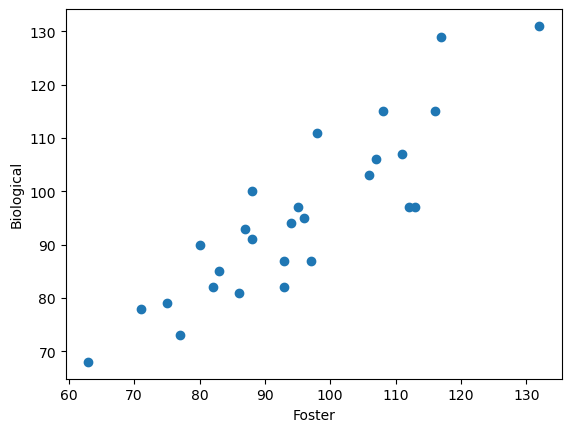

In [9]:
plt.scatter('Foster','Biological',data=twins)
plt.xlabel('Foster')
plt.ylabel('Biological')
plt.show()

#### Relationship of Social Class by Foster & Biological twins

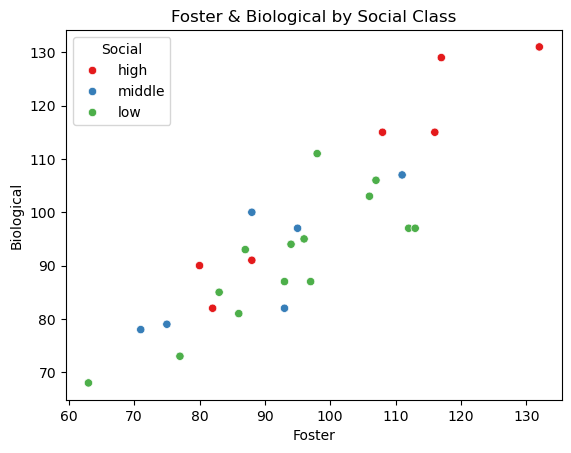

In [10]:
sns.scatterplot(data=twins, x='Foster', y='Biological', hue='Social', palette='Set1')
plt.title('Foster & Biological by Social Class')
plt.show()

#### Let's check out the correlation matrices.

<Axes: >

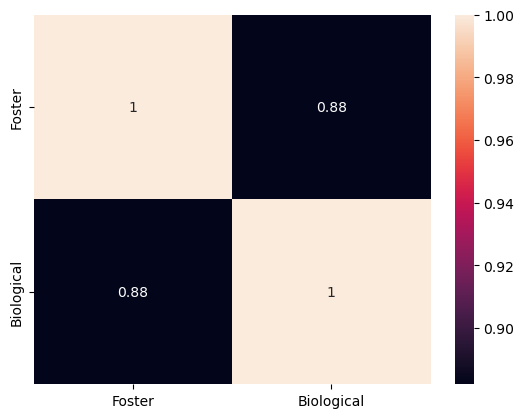

In [11]:
sns.heatmap(twins[['Foster','Biological']].corr(),annot=True)

#### Obviously the correlation are high and positive.

#### Plot the check out the distributions of the 'Foster' and the 'Biological' kids IQ.

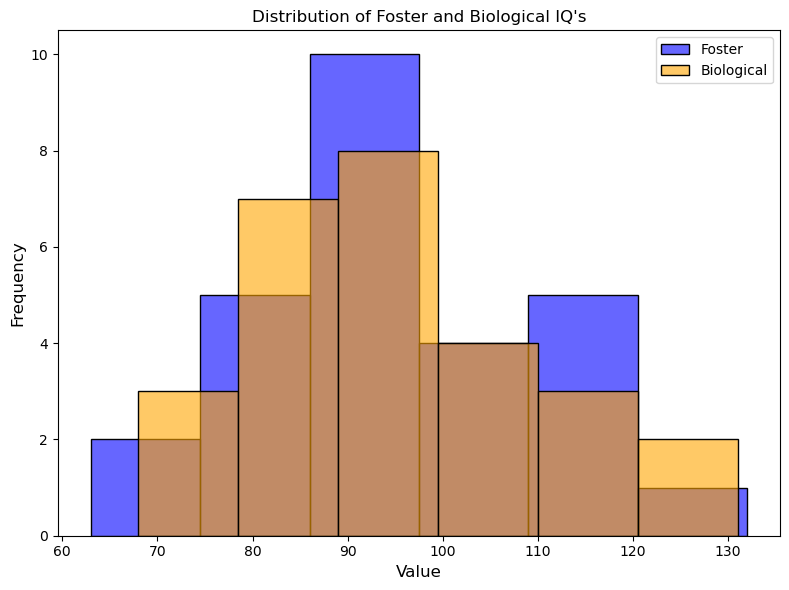

In [3]:
plt.figure(figsize=(8, 6))
sns.histplot(twins['Foster'], color='blue', kde=False, label='Foster', alpha=0.6)
sns.histplot(twins['Biological'], color='orange', kde=False, label='Biological', alpha=0.6)
plt.title("Distribution of Foster and Biological IQ's")
plt.xlabel('Value', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.legend()
plt.tight_layout()
plt.show()

#### Now let's prepare the data for Regression i.e.,
- #### Convert the categorical one to 'one-hot' encoded ones.
- #### Scale the data.

In [4]:
dummies=pd.get_dummies(twins.Social,dtype='int',drop_first=True)
twins_1=pd.concat([twins.drop('Social',axis='columns'),dummies],axis='columns')
twins_1.head()

,Foster,Biological,low,middle
0,82,82,0,0
1,80,90,0,0
2,88,91,0,0
3,108,115,0,0
4,116,115,0,0


In [7]:
int_cols=['Foster','Biological']
from sklearn.preprocessing import StandardScaler
standard_scaler=StandardScaler().fit(twins[int_cols])
int_cols_scaled=standard_scaler.transform(twins[int_cols])

In [9]:
scaled_df = pd.DataFrame(int_cols_scaled, columns=int_cols)
twins_2 = twins_1.copy()
twins_2[int_cols] = scaled_df

In [25]:
from sklearn.model_selection import train_test_split
x=twins_2.drop('Biological',axis='columns')
y=twins_2['Biological']

In [28]:
model=sm.OLS.from_formula('y~x',data=twins_2).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.829
Model:                            OLS   Adj. R-squared:                  0.806
Method:                 Least Squares   F-statistic:                     37.10
Date:                Tue, 10 Dec 2024   Prob (F-statistic):           5.57e-09
Time:                        11:12:39   Log-Likelihood:                -14.489
No. Observations:                  27   AIC:                             36.98
Df Residuals:                      23   BIC:                             42.16
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3674      0.176      2.088      0.0

#### 82.9% of the variation is explained by the predictors with the p-value being significant with "F-statistic: 37.10". The maximum of the variance is explained by the 'Foster' kids IQ and then the rest determined by their social class.

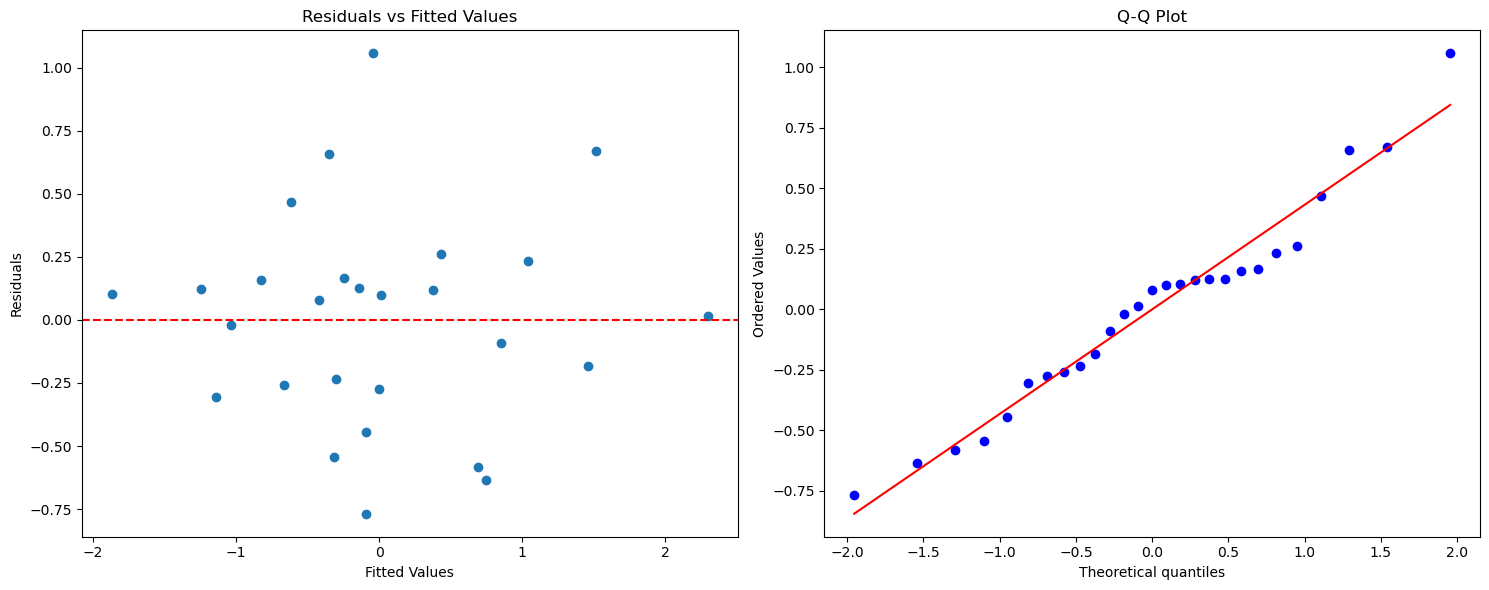

In [31]:
import scipy.stats as stats
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))
ax1.scatter(model.fittedvalues, model.resid)
ax1.axhline(0, color='red', linestyle='--')
ax1.set_xlabel("Fitted Values")
ax1.set_ylabel("Residuals")
ax1.set_title("Residuals vs Fitted Values")
stats.probplot(model.resid, dist="norm", plot=ax2)
ax2.set_title("Q-Q Plot")
plt.tight_layout()
plt.show()

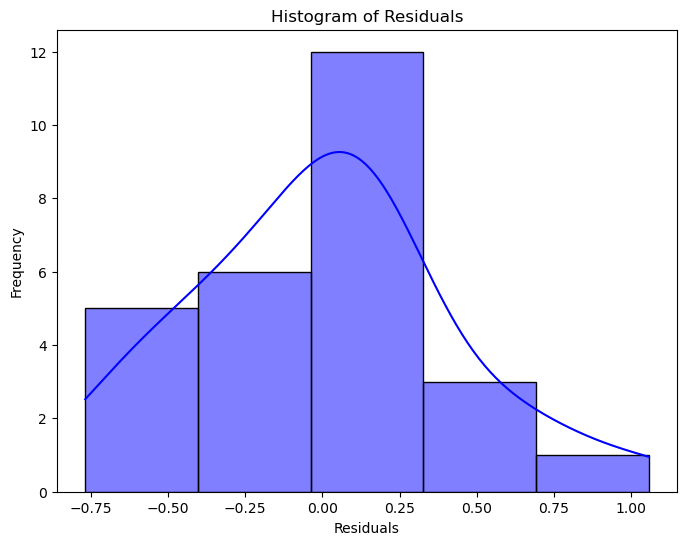

In [33]:
plt.figure(figsize=(8, 6))
sns.histplot(model.resid, kde=True, bins=5, color='blue')
plt.title("Histogram of Residuals")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()

#### All the assumptions of Linear Regression are followed

In [37]:
y_pred_lr=model.predict(x)

In [38]:
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
mse = mean_squared_error(y, y_pred_lr)
rmse = mse ** 0.5
mae = mean_absolute_error(y, y_pred_lr)
r2 = r2_score(y, y_pred_lr)
print(f"Mean Squared Error (MSE): {mse:.2f}")
print(f"Root Mean Squared Error (RMSE): {rmse:.2f}")
print(f"Mean Absolute Error (MAE): {mae:.2f}")
print(f"R-squared (R²): {r2:.2f}")

Mean Squared Error (MSE): 0.17
Root Mean Squared Error (RMSE): 0.41
Mean Absolute Error (MAE): 0.32
R-squared (R²): 0.83


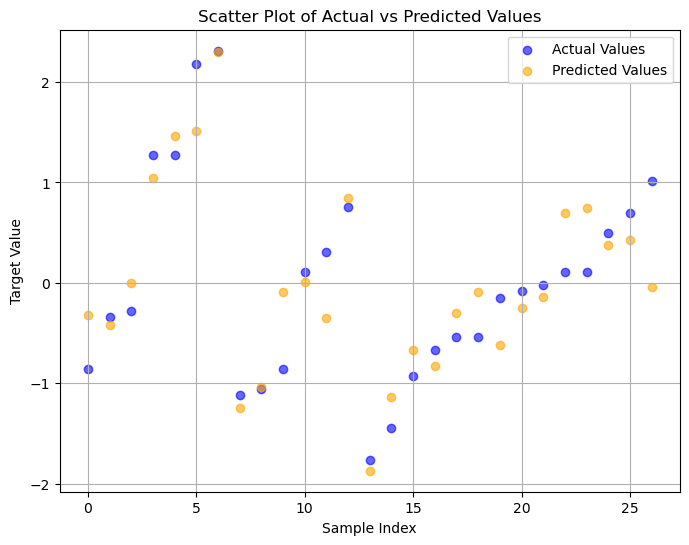

In [39]:
plt.figure(figsize=(8, 6))
plt.scatter(range(len(y)), y, color='blue', alpha=0.6, label='Actual Values')
plt.scatter(range(len(y_pred_lr)), y_pred_lr, color='orange', alpha=0.6, label='Predicted Values')
plt.xlabel('Sample Index')
plt.ylabel('Target Value')
plt.title('Scatter Plot of Actual vs Predicted Values')
plt.legend()
plt.grid(True)
plt.show()